In [5]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
from PIL import Image
import kagglehub

path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")
print("Path to dataset files:", path)



Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1


Number of Male Images =  2720
Number of Female Images =  2698
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


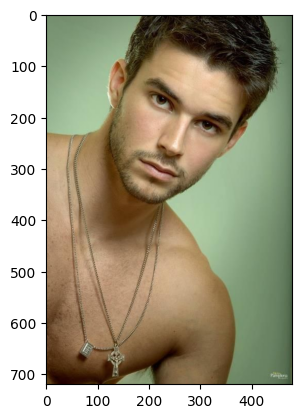

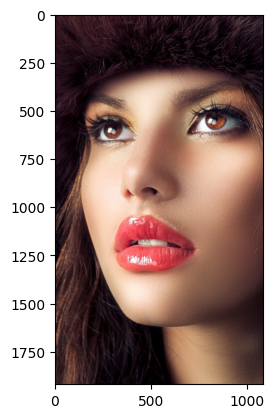

In [6]:



import os
male_file = os.listdir('/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces')
female_file = os.listdir('/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces')

print("Number of Male Images = ", len(male_file))
print("Number of Female Images = ", len(female_file))

male_label = [1]*len(male_file)
female_label = [0]*len(female_file)


labels = male_label + female_label
print(labels[:5])
print(labels[-5:])


img = mimg.imread("/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces/1 (105).jpg")
plot = plt.imshow(img)
plt.show()

img=mimg.imread("/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces/0 (1101).jpg")
plot=plt.imshow(img)
plt.show()

2720 2698


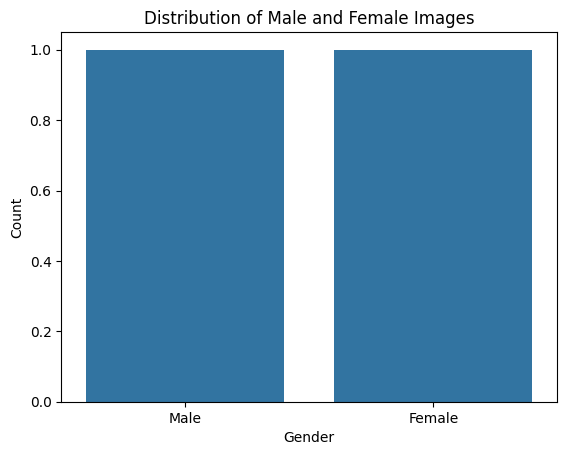

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

num_male = len(male_file)
num_female = len(female_file)
labels = ['Male', 'Female']


sns.countplot(x=labels, data=pd.DataFrame({'gender': labels, 'count': [num_male, num_female]}))

print(num_male,num_female)
plt.title('Distribution of Male and Female Images')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


In [ ]:

data=[]

male_path='/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces'

for file in os.listdir(male_path):
    file_path = os.path.join(male_path, file)

    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


female_path='/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces'

for file in os.listdir(female_path):
    file_path = os.path.join(female_path, file)


    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)



print(len(data))
print(len(labels))

data[0].shape


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5418
2


(128, 128, 3)

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


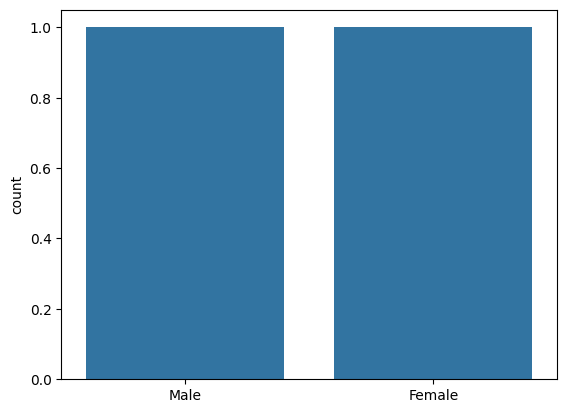

In [ ]:


male_label = [1]*len(male_file)
female_label = [0]*len(female_file)


image_labels = male_label + female_label
print(image_labels[:5])
print(image_labels[-5:])




sns.countplot(x=labels, data=pd.DataFrame({'gender': labels, 'count': [num_male, num_female]}))


X=np.array(data)

Y=np.array(image_labels)

X.shape,Y.shape

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

x_train_scl=x_train/255
x_test_scl=x_test/255

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.50),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.50),

    keras.layers.Dense(2, activation='sigmoid')
    ])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,266,434 (62.05 MB)

 Trainable params: 16,266,434 (62.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 4,879,810 (18.61 MB)

 Trainable params: 2,621,826 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:




Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)




Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 528ms/step - accuracy: 0.8426 - loss: 0.9719 - val_accuracy: 0.9611 - val_loss: 0.0970
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 74s 475ms/step - accuracy: 0.9596 - loss: 0.1114 - val_accuracy: 0.9898 - val_loss: 0.0485
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 479ms/step - accuracy: 0.9785 - loss: 0.0597 - val_accuracy: 0.9816 - val_loss: 0.0403
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 444ms/step - accuracy: 0.9889 - loss: 0.0328 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 63s 460ms/step - accuracy: 0.9864 - loss: 0.0350 - val_accuracy: 0.9898 - val_loss: 0.0436
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 445ms/step - accuracy: 0.9892 - loss: 0.0274 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 89s 498ms/step - accuracy: 0.9873 - loss: 0.0298 - val_accuracy: 0.9959 - val_loss: 0.0366
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 62s 448ms/step - accuracy: 0.9941 - loss: 0

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.9932 - loss: 0.0407
The Accuracy =  98 %


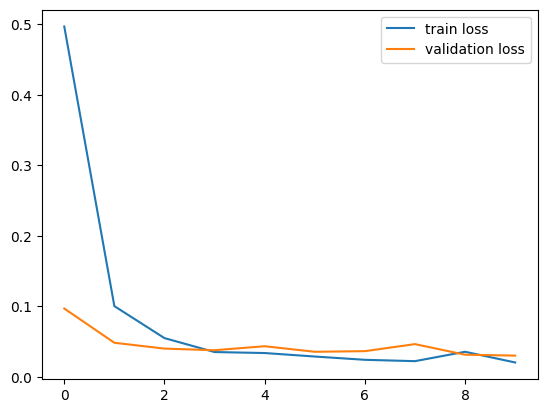

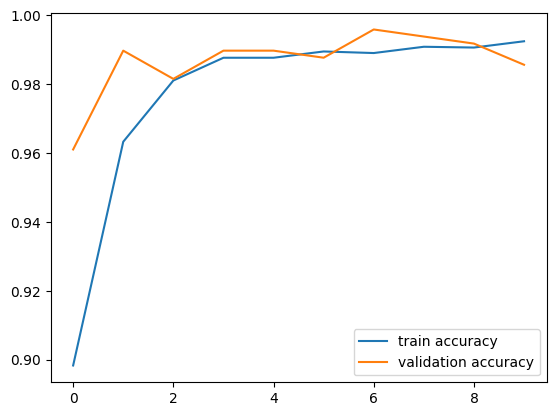

In [ ]:


loss, acc = model.evaluate(x_test_scl, y_test)
print('The Accuracy = ', int(acc * 100), '%')

h = Model

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()




17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step


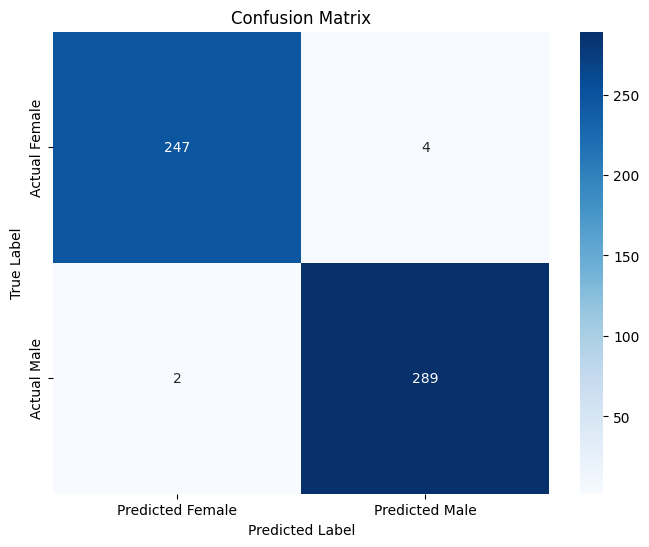

Training Accuracy: 0.9925
Validation Accuracy: 0.9857
Test Accuracy: 0.9889
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       251
           1       0.99      0.99      0.99       291

    accuracy                           0.99       542
   macro avg       0.99      0.99      0.99       542
weighted avg       0.99      0.99      0.99       542



In [ ]:



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns



y_pred = model.predict(x_test_scl)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

cm_df = pd.DataFrame(cm, index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

train_accuracy = Model.history['accuracy'][-1]
val_accuracy = Model.history['val_accuracy'][-1]
test_accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.923743 to fit



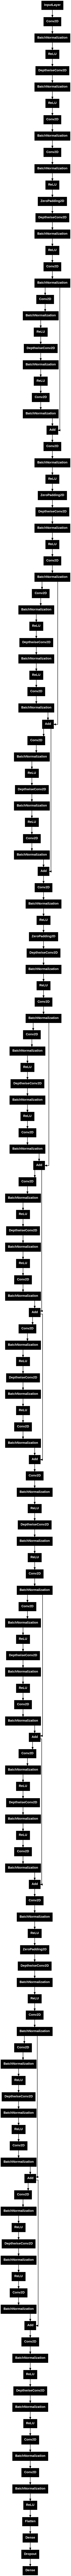

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Enter the image path: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces/1 (1005).jpg


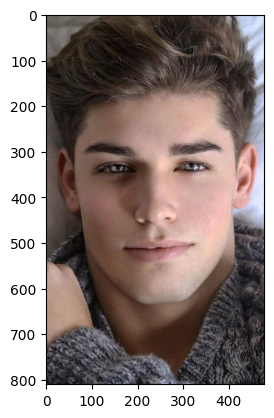

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[2.4805226e-13 1.0000000e+00]]
1
The person in the image is Male


In [ ]:


import matplotlib.image as mimg
import matplotlib.pyplot as plt
import cv2

def predict_gender(image_path):

    img = mimg.imread(image_path)
    plt.imshow(img)
    plt.show()


    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.reshape(img, [1, 128, 128, 3])


    prediction = model.predict(img)
    print(prediction)


    input_pred_label = np.argmax(prediction)
    print(input_pred_label)


    if input_pred_label == 1:
        print('The person in the image is Male')
    else:
        print('The person in the image is Female')


input_image = input("Enter the image path: ")
predict_gender(input_image)
